# Data Exploration

## Exercises
Do your work for this exercise in a file named explore.

## Imporst

In [1]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud
from nltk import ngrams
import nltk.sentiment

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#from env import get_connection_url
from env import get_db_url
import prepare as p
import acquire as a

### 1. Spam Data

a. Load the spam data set.   

In [2]:
#Get SQL database url
url = get_db_url('spam_db')

In [3]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [4]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

ham_words = p.clean(' '.join(df[df.label=='ham']['text']))
spam_words = p.clean(' '.join(df[df.label=='spam']['text']))
all_words = p.clean(' '.join(df['text']))

In [6]:
len(all_words), len(spam_words), len(ham_words)

(50018, 12044, 37974)

In [7]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [8]:
# lets combine all 3 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['ham', 'spam', 'all']

word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


**n-grams**    
**bigram**: combinations of 2 words
Represent text as combinations of 2 words    

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. 

### How do they compare with the ham bigrams? 
- The Spam words are more for advertisement. 

In [9]:
spam_list = pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20)

In [10]:
spam_list

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(every, week)           19
(await, collection)     19
(chance, win)           19
(selected, receive)     19
(send, stop)            19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(ur, mob)               15
dtype: int64

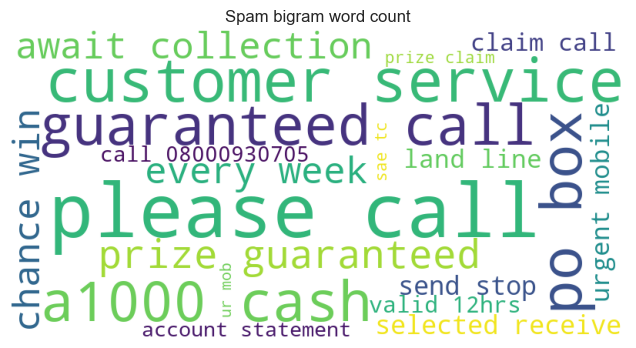

In [67]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_list.to_dict().items()}
spam_img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(spam_img)
plt.axis('off')
plt.title('Spam bigram word count')
plt.show()

In [12]:
ham_list = pd.Series(nltk.ngrams(ham_words, 2)).value_counts().head(20)

In [13]:
ham_list

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(nice, day)        15
(dont, want)       15
dtype: int64

In [74]:
def plot_brigrams(words):
    words_data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    words_img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(words_data)
    plt.figure(figsize=(8, 4))
    plt.imshow(words_img)
    plt.axis('off')
    plt.show()

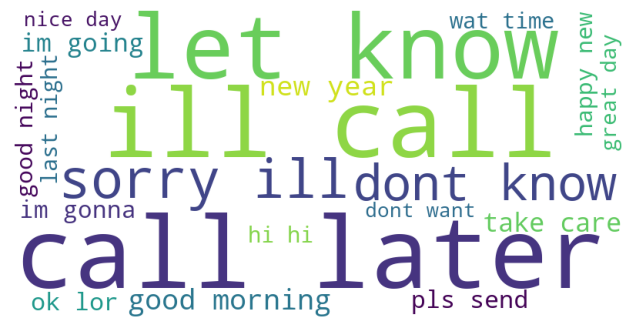

In [76]:
plot_brigrams(ham_list)

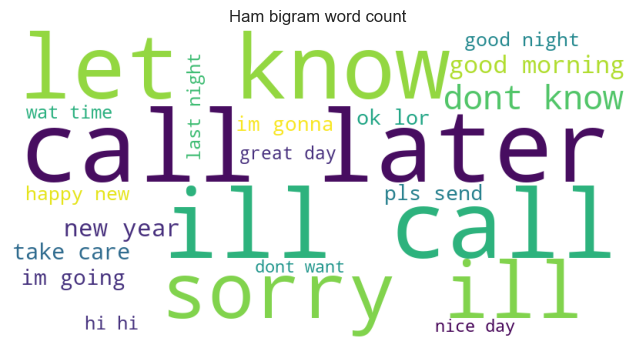

In [69]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_list.to_dict().items()}
ham_img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(ham_img)
plt.axis('off')
plt.title('Ham bigram word count')
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?      

In [77]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_list.to_dict().items()}
ham_data

{'call later': 52,
 'ill call': 48,
 'let know': 42,
 'sorry ill': 39,
 'dont know': 32,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'im going': 24,
 'ok lor': 22,
 'pls send': 22,
 'im gonna': 20,
 'happy new': 19,
 'good night': 19,
 'wat time': 18,
 'last night': 18,
 'hi hi': 18,
 'great day': 17,
 'nice day': 15,
 'dont want': 15}

In [79]:
overlay_list = [bigram for bigram in ham.list.keys() if bigram in ham.list.keys()]
overlay_list

NameError: name 'ham' is not defined

In [15]:
# Convert each series to sets
set1 = set(spam_list)
set2 = set(ham_list)

# Find the intersection of the sets
common_words = set1.intersection(set2)

# Check if there are any common words
if len(common_words) > 0:
    print("Common words found:", common_words)
else:
    print("No common words found.")

Common words found: {15, 17, 18, 19, 22, 24}


In [16]:
# lets combine spam and ham dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([ham_list, spam_list], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['ham', 'spam']

word_counts.head()

,,ham,spam
call,later,52,0
ill,call,48,0
let,know,42,0
sorry,ill,39,0
dont,know,32,0


In [17]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

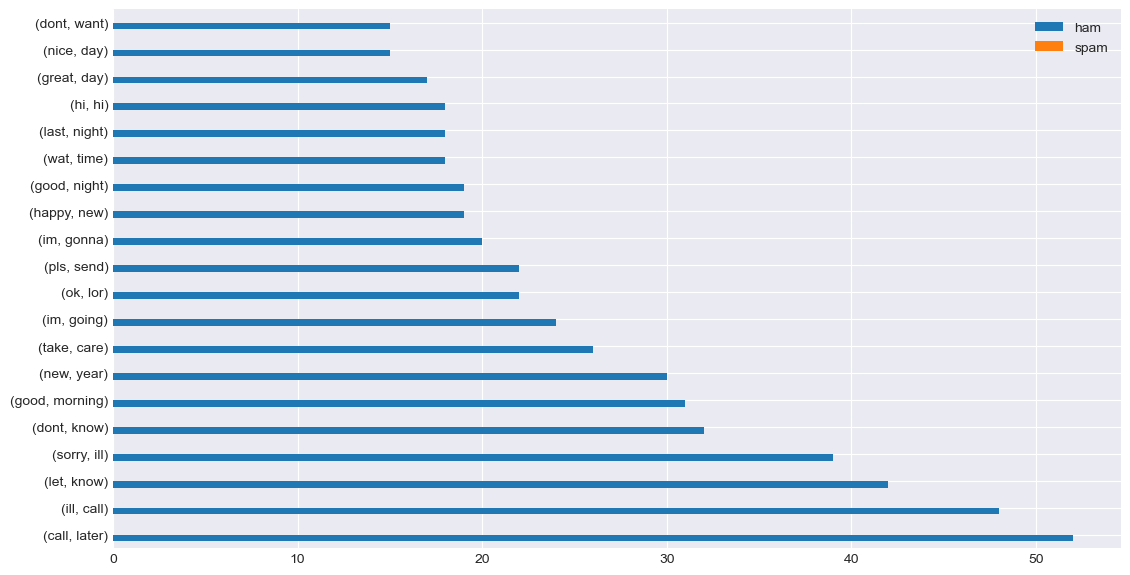

In [18]:
word_counts[['ham','spam']].head(20).plot.barh()

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data. 

In [19]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20)
ham_trigrams

(ill, call, later)           42
(sorry, ill, call)           38
(happy, new, year)           19
(pls, send, message)         13
(pick, phone, right)         12
(right, pls, send)           12
(phone, right, pls)          12
(cant, pick, phone)          12
(hi, hi, hi)                 11
(x, x, x)                     8
(good, morning, dear)         7
(kiss, across, sea)           6
(convey, birthday, wish)      6
(pls, convey, birthday)       6
(call, later, meeting)        6
(cabin, pa, said)             5
(set, callertune, caller)     5
(5, minuts, latr)             5
(entered, cabin, pa)          5
(story, man, last)            5
dtype: int64

In [20]:
spam_trigrams  = pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20)
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(reply, call, 08000930705)             14
(land, line, claim)                    14
(private, 2003, account)               13
(2003, account, statement)             13
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(camcorder, reply, call)               12
(every, week, txt)                     11
(bonus, caller, prize)                 11
(urgent, trying, contact)              11
(anytime, network, min)                11
(please, call, customer)               11
(customer, service, representative)    10
(cash, await, collection)              10
(speak, live, operator)                10
(a2000, bonus, caller)                 10
(mob, every, week)                      9
(ur, mob, every)                        9
dtype: int64

<AxesSubplot:>

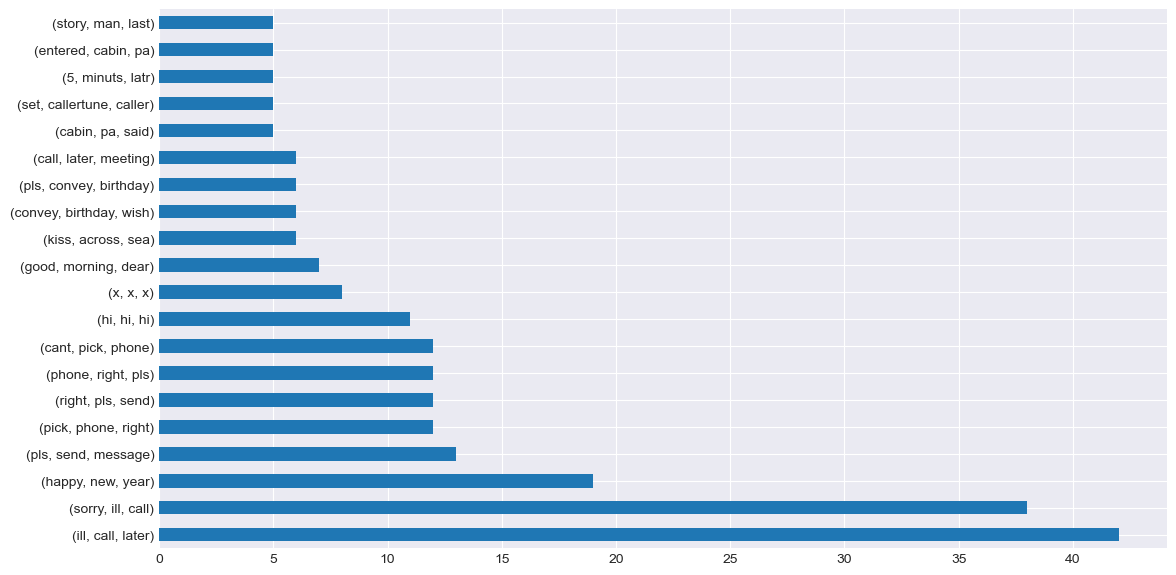

In [86]:
ham_trigrams.plot.barh()

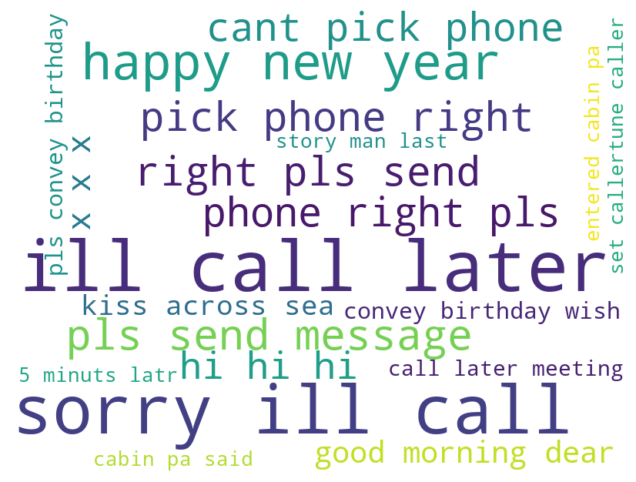

In [21]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


# Convert the trigrams series to a dictionary
data = { ' '.join(k): v for k, v in ham_trigrams.to_dict().items() }

# Generate the word cloud from the trigram frequencies
img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(data)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:>

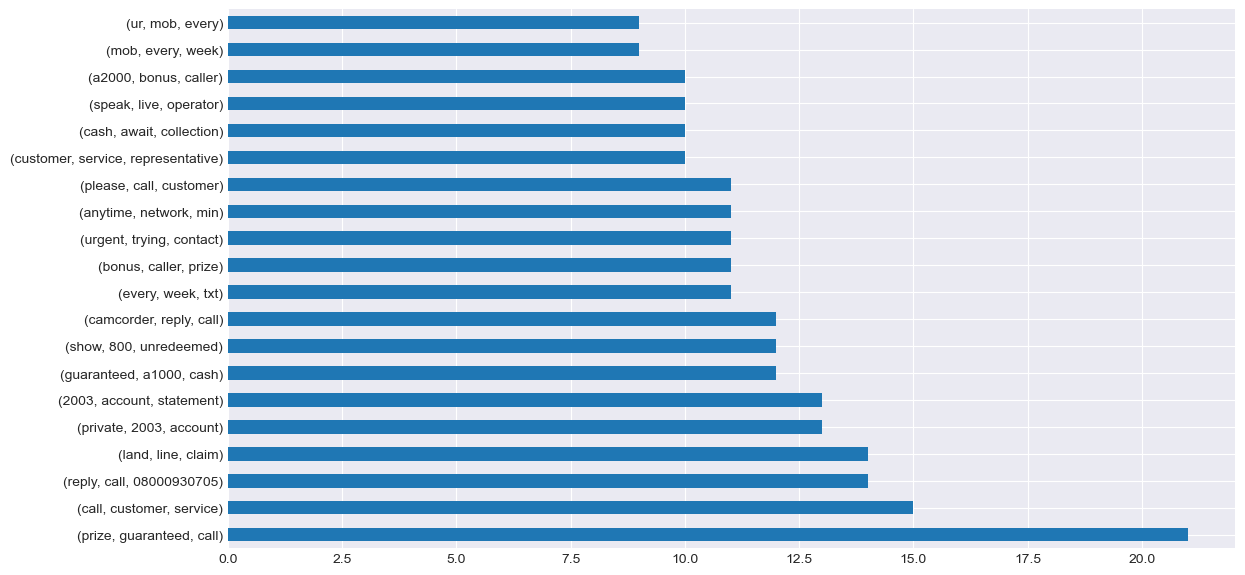

In [85]:
spam_trigrams.plot.barh()

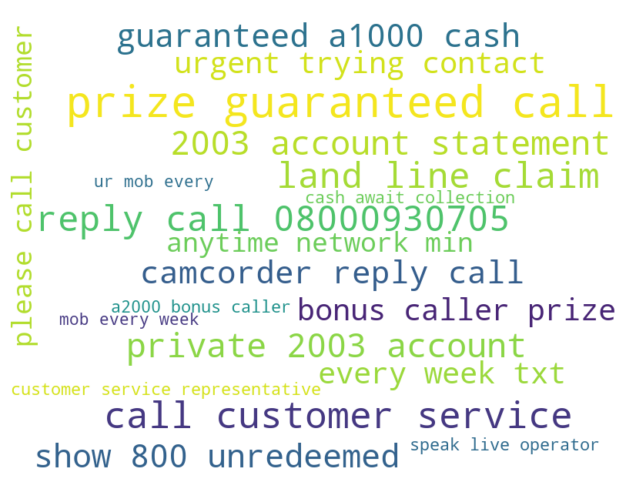

In [22]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


# Convert the trigrams series to a dictionary
data = { ' '.join(k): v for k, v in spam_trigrams.to_dict().items() }

# Generate the word cloud from the trigram frequencies
img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(data)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(img, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [23]:
blog = a.get_blog_articles()
blog

[{'title': 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa',
  'content': 'May is traditionally known as Asian American and Pacific Islander (AAPI) Heritage Month. This month we celebrate the history and contributions made possible by our AAPI friends, family, and community. We also examine our level of support and seek opportunities to better understand the AAPI community.  In an effort to address real concerns and experiences, we sat down with Arbeena Thapa, one of Codeup’s Financial Aid and Enrollment Managers. Arbeena identifies as Nepali American and Desi. Arbeena’s parents immigrated to Texas in 1988 for better employment and educational opportunities. Arbeena’s older sister was five when they made the move to the US. Arbeena was born later, becoming the first in her family to be a US citizen. At Codeup we take our efforts at inclusivity very seriously. After speaking with Arbeena, we were taught that the term AAPI excludes Desi-American in

In [24]:
# Convert the list of articles to a DataFrame
df_blog = pd.DataFrame(blog)
df_blog

title  \
0  Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa   
1                                      Women in tech: Panelist Spotlight – Magdalena Rahn   
2                              Women in tech: Panelist Spotlight – Rachel Robbins-Mayhill   
3                                        Women in Tech: Panelist Spotlight – Sarah Mellor   
4                                    Women in Tech: Panelist Spotlight – Madeleine Capper   
5                Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [25]:
df_blog.iloc[1].content

'Women in tech: Panelist Spotlight – Magdalena Rahn Codeup is hosting a Women in Tech Panel in honor of Women’s History Month on March 29th, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as women in the tech industry!  Meet Magdalena! Magdalena Rahn is a current Codeup student in a Data Science cohort in San Antonio, Texas. She has a professional background in cross-cultural communications, international business development, the wine industry and journalism. After serving in the US Navy, she decided to complement her professional skill set by attending the Data Science program at Codeup; she is set to graduate in March 2023. Magdalena is fluent in French, Bulgarian, Chinese-Mandarin, Spanish and Italian. We asked Magdalena how Codeup impacted her career, and she replied “Codeup has provided a solid foundation in analytical processes, programming and data science methods, and it’s 

In [26]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

arbeena_thapa = p.clean(' '.join(df_blog[df_blog.title=='Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa']['content']))
magdalena_rahn = p.clean(' '.join(df_blog[df_blog.title=='Women in tech: Panelist Spotlight – Magdalena Rahn']['content']))
rachel_robbins = p.clean(' '.join(df_blog[df_blog.title=='Women in tech: Panelist Spotlight – Rachel Robbins-Mayhill']['content']))
sarah_mellor = p.clean(' '.join(df_blog[df_blog.title=='Women in Tech: Panelist Spotlight – Sarah Mellor']['content']))
madeleine_capper = p.clean(' '.join(df_blog[df_blog.title=='Women in Tech: Panelist Spotlight – Madeleine Capper']['content']))
wilmarie_de_la_cruz = p.clean(' '.join(df_blog[df_blog.title=='Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia']['content']))
all_words = p.clean(' '.join(df_blog['content']))

In [27]:
len(all_words), len(arbeena_thapa), len(magdalena_rahn), len(rachel_robbins), len(sarah_mellor), len(madeleine_capper), len(wilmarie_de_la_cruz)

(1164, 452, 109, 257, 131, 126, 89)

In [28]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

arbeena_thapa_freq = pd.Series(arbeena_thapa).value_counts()
magdalena_rahn_freq = pd.Series(magdalena_rahn).value_counts()
rachel_robbins_freq = pd.Series(rachel_robbins).value_counts()
sarah_mellor_freq = pd.Series(sarah_mellor).value_counts()
madeleine_capper_freq = pd.Series(madeleine_capper).value_counts()
wilmarie_de_la_cruz_freq = pd.Series(wilmarie_de_la_cruz).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [29]:
arbeena_thapa_freq

asian            12
apida             9
u                 7
community         6
american          6
                 ..
minority          1
traditionally     1
enrollment        1
hesitant          1
growth            1
Length: 292, dtype: int64

In [30]:
blog_counts = pd.concat([arbeena_thapa_freq, magdalena_rahn_freq, rachel_robbins_freq, sarah_mellor_freq, madeleine_capper_freq, wilmarie_de_la_cruz_freq, all_freq], axis=1).fillna(0).astype(int)
# rename the col names
blog_counts.columns = ['arbeena', 'magdalena', 'rachel', 'sarah', 'madeleine', 'wilmarie', 'all']

blog_counts.head()

,arbeena,magdalena,rachel,sarah,madeleine,wilmarie,all
asian,12,0,0,0,0,0,12
apida,9,0,0,0,0,0,9
u,7,1,0,1,0,1,10
community,6,0,1,0,0,0,7
american,6,0,0,0,0,0,6


In [31]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

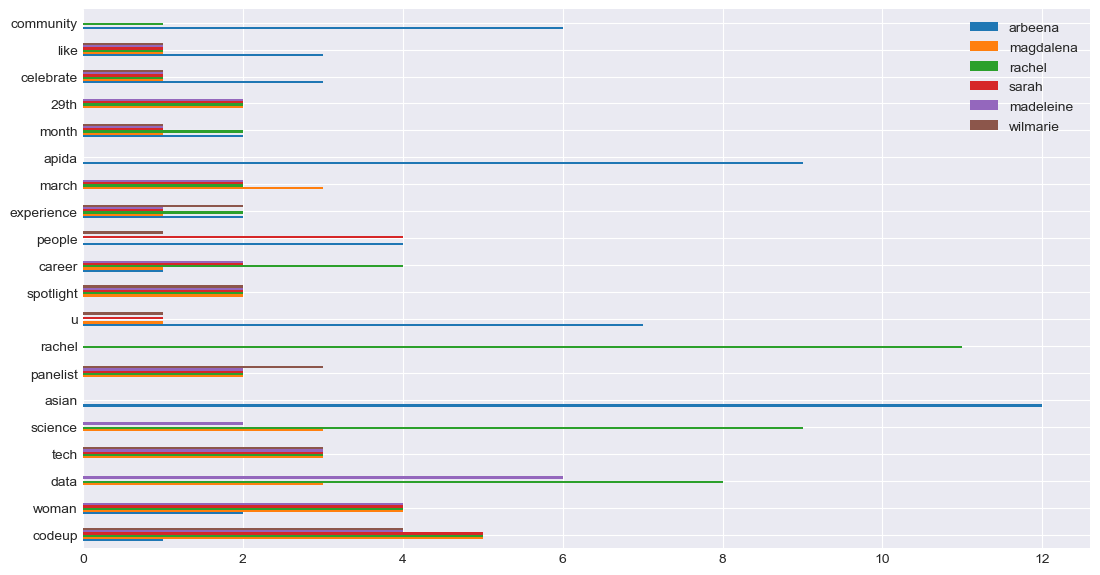

In [32]:
blog_counts.sort_values('all', ascending=False)[['arbeena', 'magdalena', 'rachel', 'sarah', 'madeleine', 'wilmarie']].head(20).plot.barh()

In [33]:
blog_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'], axis=1)

,arbeena,magdalena,rachel,sarah,madeleine,wilmarie,all
codeup,0.041667,0.208333,0.208333,0.208333,0.166667,0.166667,1.0
woman,0.111111,0.222222,0.222222,0.222222,0.222222,0.000000,1.0
data,0.000000,0.176471,0.470588,0.000000,0.352941,0.000000,1.0
tech,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,1.0
science,0.000000,0.214286,0.642857,0.000000,0.142857,0.000000,1.0
asian,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
panelist,0.000000,0.181818,0.181818,0.181818,0.181818,0.272727,1.0
rachel,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
u,0.700000,0.100000,0.000000,0.100000,0.000000,0.100000,1.0
spotlight,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,1.0


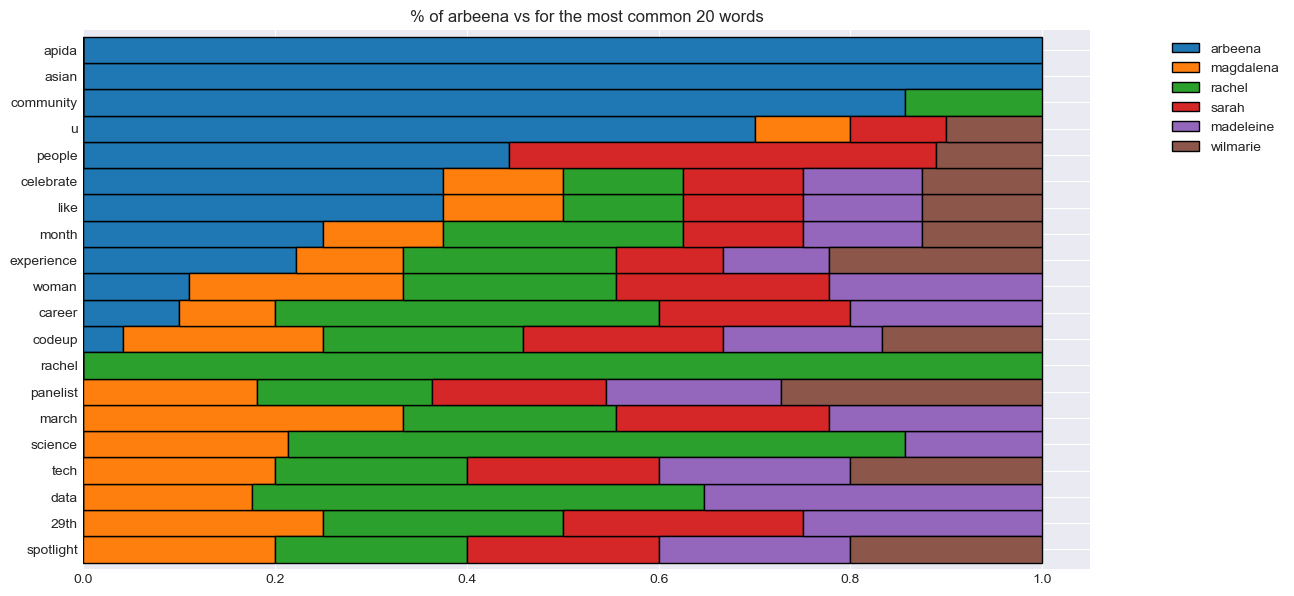

In [34]:
(blog_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='arbeena')
.plot.barh(stacked=True, width=1, ec='black')
)
plt.title('% of arbeena vs for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

<AxesSubplot:>

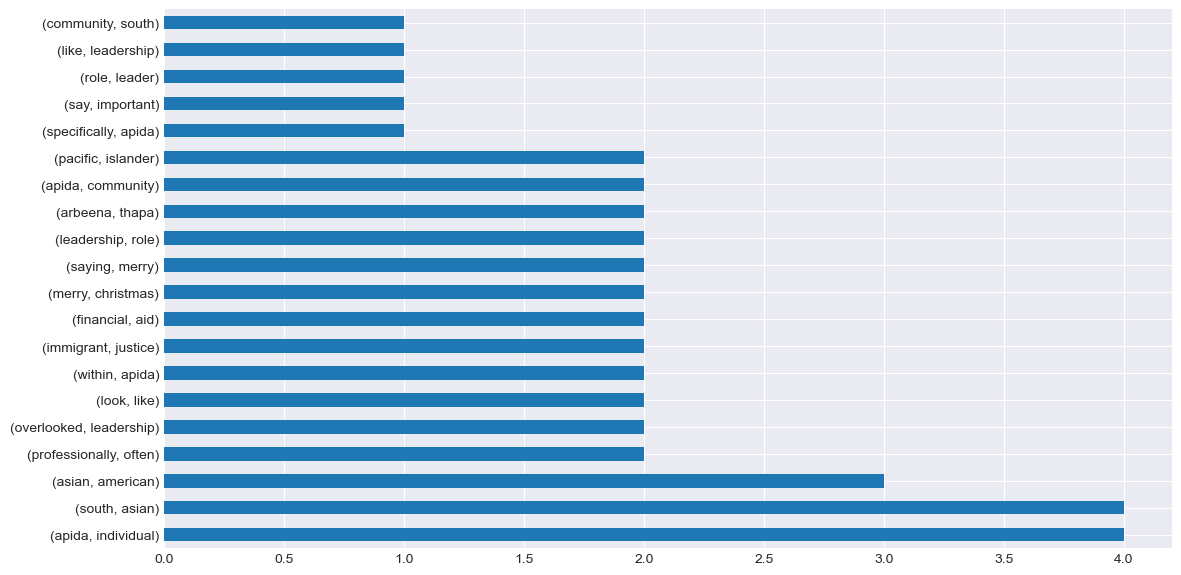

In [35]:
pd.Series(nltk.bigrams(arbeena_thapa)).value_counts().head(20).plot.barh()

In [36]:
img = WordCloud(background_color='white').generate(' '.join(arbeena_thapa))

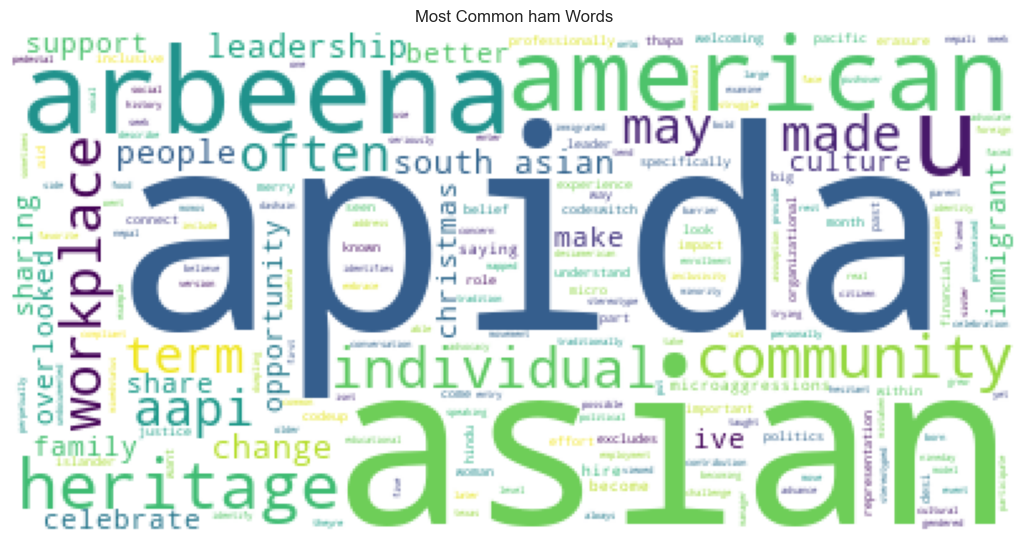

In [37]:
plt.imshow(img)
plt.axis('off')
plt.title("Most Common ham Words")
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [38]:
news = a.get_news_articles()
news

[{'category': 'business',
  'title': "Rau's IAS, Seekers Education fined for misleading ads",
  'content': "The Central Consumer Protection Authority (CCPA) has imposed penalties of ₹1 lakh and ₹50,000 on Rau's IAS Study Circle and Seekers Education, respectively, for misleading advertisements. Rau's IAS was fined over claims of 'successful students' in absence of necessary disclosure with regard to the course opted by the aspirant. Seekers Education was fined for claiming a success ratio of 99.99%."},
 {'category': 'business',
  'title': "Tech Mahindra CEO CP Gurnani's salary halves to ₹30.14 crore in FY23",
  'content': "Tech Mahindra CEO CP Gurnani's total remuneration fell 51% year-on-year to ₹30.14 crore in the fiscal year ended March 31, 2023, as the company's profits declined. His pay includes a salary of ₹2.75 crore, perquisites of ₹25.56 crore, and a commission of ₹1.83 crore. However, his pay was still 467 times the median salary of a Tech Mahindra employee."},
 {'category': 

In [39]:
# Convert the list of articles to a DataFrame
df_news = pd.DataFrame(news)
df_news

,category,title,content
0,business,"Rau's IAS, Seekers Education fined for misleading ads","The Central Consumer Protection Authority (CCPA) has imposed penalties of ₹1 lakh and ₹50,000 on Rau's IAS Study Circle and Seekers Education, respectively, for misleading advertisements. Rau's IAS was fined over claims of 'successful students' in absence of necessary disclosure with regard to the course opted by the aspirant. Seekers Education was fined for claiming a success ratio of 99.99%."
1,business,Tech Mahindra CEO CP Gurnani's salary halves to ₹30.14 crore in FY23,"Tech Mahindra CEO CP Gurnani's total remuneration fell 51% year-on-year to ₹30.14 crore in the fiscal year ended March 31, 2023, as the company's profits declined. His pay includes a salary of ₹2.75 crore, perquisites of ₹25.56 crore, and a commission of ₹1.83 crore. However, his pay was still 467 times the median salary of a Tech Mahindra employee."
2,business,Not an endorsement: Govt on ad with Google featuring financial influencer,"Google's collaborative advertisement with the government featuring financial influencer Rachana Ranade with the caption, ""Trust only the real experts,"" is being criticised online. Several Twitter users pointed out that the advertisement looked like the government was endorsing Ranade. ""This is not an endorsement of any person or any social media platform,"" Union Minister Rajeev Chandrasekhar said."
3,business,India to soon have ethanol-powered vehicles running at ₹15 per litre: Gadkari,"Union Minister Nitin Gadkari said that India will soon have vehicles running entirely on ethanol. ""I will launch Toyota Camry that will run 100% on ethanol and it will also generate 40% electricity,"" Gadkari said. ""If you compare it with petrol, the average will be ₹15/litre because ethanol's rate is ₹60...while petrol costs ₹120/litre....plus it'd generate 40% electricity,"" he added."
4,business,Drone maker ideaForge's ₹567 crore IPO fully subscribed in 2 hours,"The initial public offering (IPO) of India's largest drone maker ideaForge Technology was fully subscribed within two hours of opening for subscription on Monday. The issue was subscribed 1.23 times as of 12.40 pm, with retail investors leading the bidding. The price band for IPO is set at ₹638-672 per share and the company is looking to raise ₹567 crore."
...,...,...,...
95,entertainment,First look of Hrithik Roshan's 'Fighter' released,"Hrithik Roshan on Monday shared the first look of his upcoming aerial action film 'Fighter' on his Instagram handle. He captioned the still with the hashtag ""7 months to Fighter"". Directed by Siddharth Anand, the film will arrive in theatres on January 25, 2024. In addition to Hrithik, it will feature Deepika Padukone and Anil Kapoor."
96,entertainment,"1,000 dancers had to reshoot as Bhansali saw 1 unlit lamp: Sharad","Sharad Kelkar shared an incident from the sets of 'Ram-Leela' and revealed a dance sequence involving 1,000 people had to be reshot as Sanjay Leela Bhansali noticed one unlit lamp in the background. ""A normal filmmaker wouldn't give a damn about it saying there are 50 other lamps...but...he (Bhansali) said, 'The dia isn't lit there, go light it',"" Sharad added. \n"
97,entertainment,Many are comfortable with it: Sharman Joshi on casting couch,"Sharman Joshi said that while he doesn't have doubts about the possibilities of casting couch, ""there are many youngsters...who are comfortable with it"". The actor added it's ""tough"" to stand against someone who's powerful and rich. ""They're aware of...that if they do get in trouble, they have...highest ones to help them swing out of it,"" Sharman shared in an interview."
98,entertainment,Should have worn a helmet: Shah Rukh on 'Deewana' bike scene,"Shah Rukh Khan, during a question-answer session on Twitter, responded to a fan who shared a scene from his debut film 'Deewana', where the actor was seen riding a bike without a helmet. ""Sir how do you feel when you watch this epic entry of yo

In [40]:
#Value counts of labels
df_news['category'].value_counts()

business         25
sports           25
technology       25
entertainment    25
Name: category, dtype: int64

In [51]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

business = p.clean(' '.join(df_news[df_news.category=='business']['content']))
sports = p.clean(' '.join(df_news[df_news.category=='sports']['content']))
technology = p.clean(' '.join(df_news[df_news.category=='technology']['content']))
entertainment = p.clean(' '.join(df_news[df_news.category=='entertainment']['content']))
all_words = p.clean(' '.join(df_news['content']))

In [52]:
len(all_words), len(business), len(sports), len(technology), len(entertainment)

(3727, 963, 977, 948, 839)

In [53]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

business_freq = pd.Series(business).value_counts()
sports_freq = pd.Series(sports).value_counts()
technology_freq = pd.Series(technology).value_counts()
entertainment_freq = pd.Series(entertainment).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [54]:
business_freq

said               20
crore              14
bank               13
india              13
company             9
                   ..
income              1
amid                1
biggest             1
one                 1
exchangedeposit     1
Length: 623, dtype: int64

In [55]:
news_counts = pd.concat([business_freq, sports_freq, technology_freq, entertainment_freq, all_freq], axis=1).fillna(0).astype(int)
# rename the col names
news_counts.columns = ['business', 'sports', 'technology', 'entertainment', 'all']

news_counts.head()

,business,sports,technology,entertainment,all
said,20,17,19,18,74
crore,14,0,7,1,22
bank,13,0,2,0,15
india,13,11,10,3,37
company,9,1,9,0,19


In [56]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

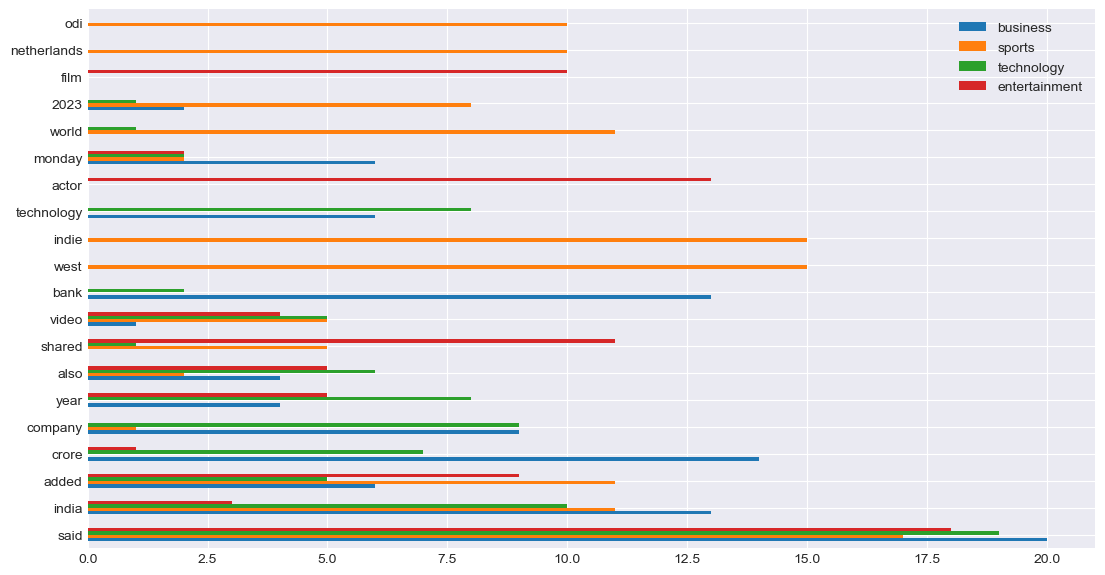

In [57]:
news_counts.sort_values('all', ascending=False)[['business', 'sports', 'technology', 'entertainment']].head(20).plot.barh()

In [58]:
news_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'], axis=1)

,business,sports,technology,entertainment,all
said,0.270270,0.229730,0.256757,0.243243,1.0
india,0.351351,0.297297,0.270270,0.081081,1.0
added,0.193548,0.354839,0.161290,0.290323,1.0
crore,0.636364,0.000000,0.318182,0.045455,1.0
company,0.473684,0.052632,0.473684,0.000000,1.0
year,0.235294,0.000000,0.470588,0.294118,1.0
also,0.235294,0.117647,0.352941,0.294118,1.0
shared,0.000000,0.294118,0.058824,0.647059,1.0
video,0.066667,0.333333,0.333333,0.266667,1.0
bank,0.866667,0.000000,0.133333,0.000000,1.0


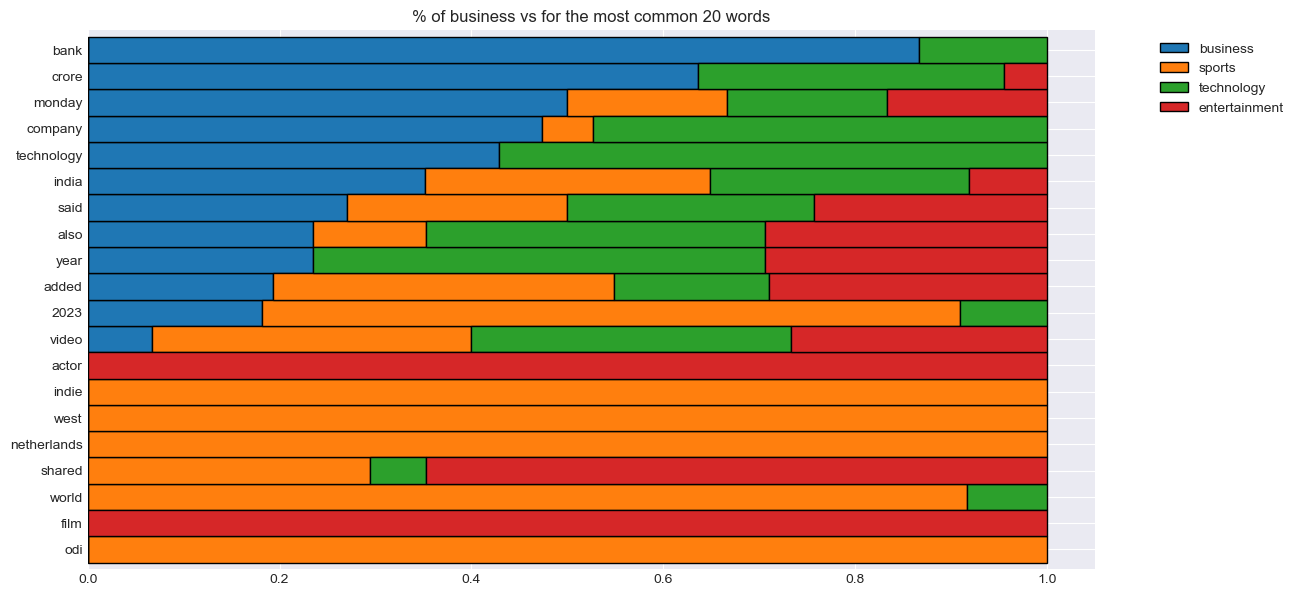

In [59]:
(news_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='business')
.plot.barh(stacked=True, width=1, ec='black')
)
plt.title('% of business vs for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

<AxesSubplot:>

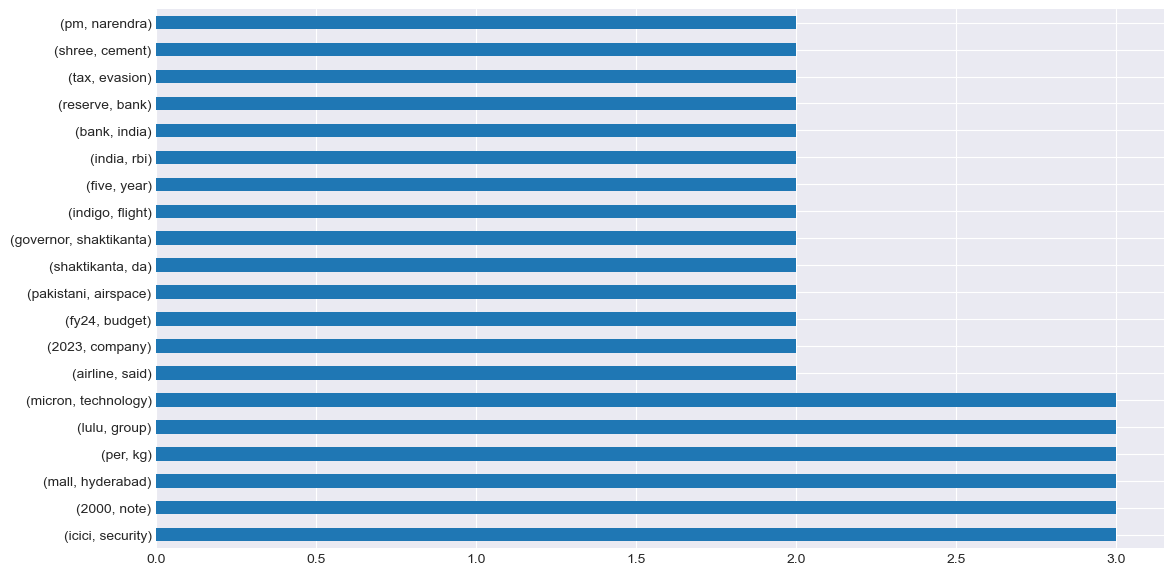

In [60]:
pd.Series(nltk.bigrams(business)).value_counts().head(20).plot.barh()

In [61]:
img = WordCloud(background_color='white').generate(' '.join(business))

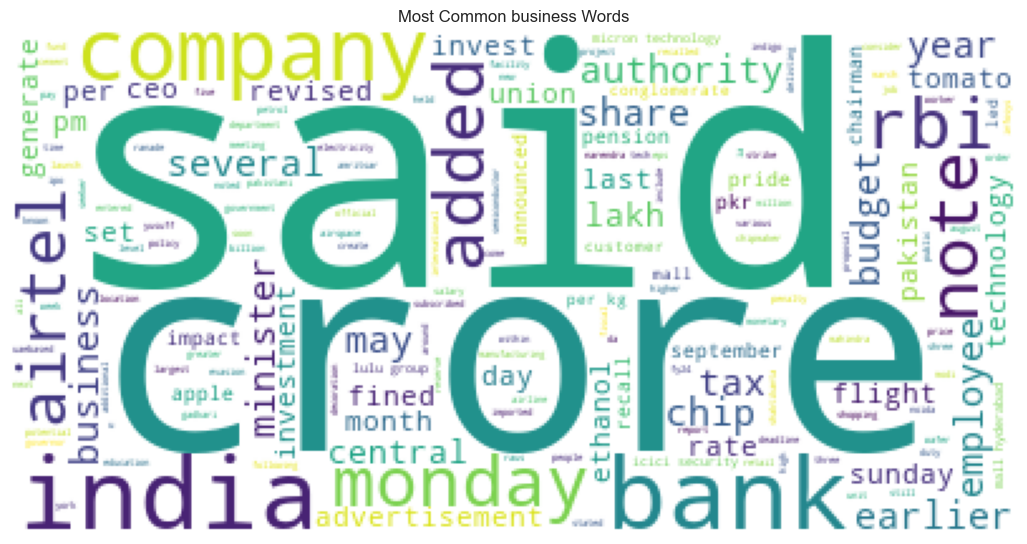

In [63]:
plt.imshow(img)
plt.axis('off')
plt.title("Most Common business Words")
plt.show()